<a href="https://colab.research.google.com/github/shukaracharya/Asignment/blob/main/SamvidDhiipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

# Load the dataset
df = pd.read_csv("/content/data.csv",'data.csv')
df.head()


<ipython-input-62-d1544cd702d3>:8: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("/content/data.csv",'data.csv')
<ipython-input-62-d1544cd702d3>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/data.csv",'data.csv')


,"1,23,3,1,19,3"
0,"2,15,3,1,17,3"
1,"1,23,3,2,49,3"
2,"1,5,2,2,33,3"
3,"2,7,11,2,55,3"
4,"2,23,3,1,20,3"


In [63]:
headers=['english speaker', 'Instructor','Course','Summer & Regular Sem','Size','score'] 
df=pd.read_csv('data.csv',header=None, names=headers, na_values='?')


In [64]:
df.head()

,english speaker,Instructor,Course,Summer & Regular Sem,Size,score
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [65]:
df.tail()

,english speaker,Instructor,Course,Summer & Regular Sem,Size,score
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [66]:
df.isnull().sum()

english speaker         0
Instructor              0
Course                  0
Summer & Regular Sem    0
Size                    0
score                   0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   english speaker       151 non-null    int64
 1   Instructor            151 non-null    int64
 2   Course                151 non-null    int64
 3   Summer & Regular Sem  151 non-null    int64
 4   Size                  151 non-null    int64
 5   score                 151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [68]:
df.describe()

,english speaker,Instructor,Course,Summer & Regular Sem,Size,score
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [69]:
df.shape

(151, 6)

In [70]:
df.size

906

In [71]:
df['score'].unique()

array([3, 2, 1])

In [72]:
df['score'].value_counts()

3    52
2    50
1    49
Name: score, dtype: int64

<Figure size 600x600 with 0 Axes>

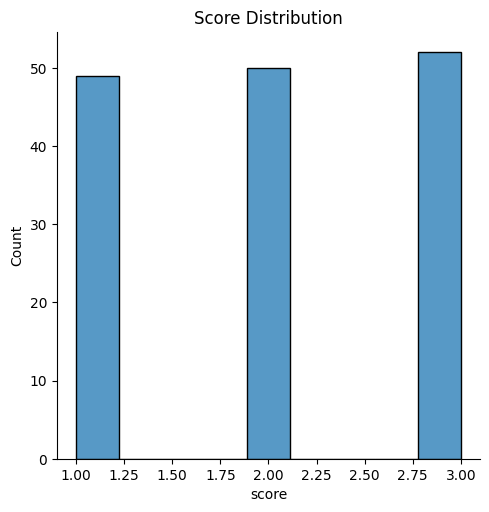

In [73]:
plt.figure(figsize=(6,6))
sns.displot(df['score'])
plt.title('Score Distribution')
plt.show()

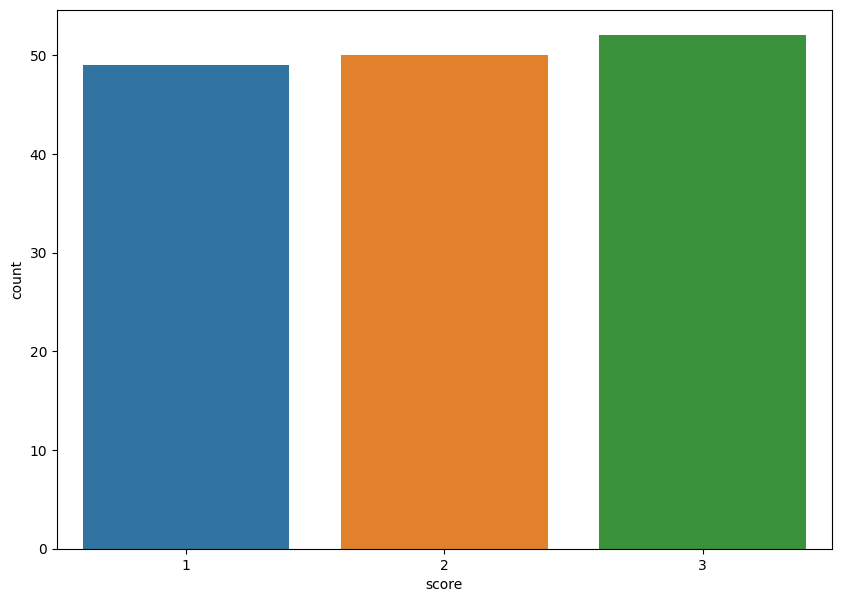

In [74]:
plt.figure(figsize=(10,7))
sns.countplot(x='score',data=df)
plt.show()

In [75]:
x= df.drop(columns='score')
y=df["score"]

In [76]:
x

,english speaker,Instructor,Course,Summer & Regular Sem,Size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [77]:
y

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: score, Length: 151, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [84]:
print('x_train: ',x_train.shape)
print('x_train: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_train: ',y_test.shape)

x_train:  (120, 5)
x_train:  (31, 5)
y_train:  (120,)
y_train:  (31,)


In [88]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred=lr.predict(x_test)
y_pred

array([1, 3, 3, 1, 1, 1, 3, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 1, 1, 2, 1, 3,
       1, 2, 2, 2, 2, 1, 1, 1, 1])

In [90]:
accuracy = lr.score(x_test,y_test)
accuracy

0.5806451612903226

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf= RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [93]:
y_pred=rf.predict(x_test)
y_pred

array([1.192     , 1.941     , 1.863     , 1.49149643, 1.229     ,
       1.32666667, 2.50756429, 1.954     , 1.999     , 2.12528095,
       2.516     , 2.7605    , 1.364     , 2.91123373, 2.084     ,
       1.34794156, 1.56010952, 1.372     , 1.97096667, 2.77654127,
       1.28863333, 2.45021429, 1.774     , 2.963     , 1.49088019,
       2.92006667, 1.34233333, 1.47507489, 1.504     , 1.2658    ,
       1.765     ])

In [94]:
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

0.6895693465352977


In [95]:
y_pred_df=pd.DataFrame(y_pred)
y_pred_df['Actual']=y_test
y_pred_df.columns=['predicted','Actual']
y_pred_df

,predicted,Actual
0,1.192000,NaN
1,1.941000,NaN
2,1.863000,NaN
3,1.491496,NaN
4,1.229000,NaN
5,1.326667,NaN
6,2.507564,NaN
7,1.954000,NaN
8,1.999000,NaN
9,2.125281,3.0


In [96]:
error= abs(y_pred-y_test)
error

76     0.192000
18     0.059000
82     1.137000
81     1.508504
143    0.229000
31     0.326667
78     0.492436
64     0.046000
55     0.001000
85     0.874719
45     0.484000
12     0.239500
36     0.364000
9      0.088766
19     0.084000
137    0.652058
114    0.560110
146    0.372000
56     0.029033
133    0.776541
29     0.288633
84     0.549786
26     0.226000
132    0.963000
124    1.509120
142    1.920067
111    0.342333
67     0.475075
98     0.496000
30     0.265800
22     0.235000
Name: score, dtype: float64

In [98]:
mse=np.mean(error)
print("MSE: ",mse)

MSE:  0.5092628254362125


In [99]:
mape = 100*(error/y_test)
mape

76      19.200000
18       2.950000
82      37.900000
81      50.283452
143     22.900000
31      32.666667
78      16.414524
64       2.300000
55       0.050000
85      29.157302
45      16.133333
12       7.983333
36      36.400000
9        2.958876
19       4.200000
137     32.602922
114     56.010952
146     37.200000
56       1.451667
133     38.827063
29      28.863333
84      18.326190
26      11.300000
132     48.150000
124     50.303994
142    192.006667
111     34.233333
67      47.507489
98      24.800000
30      26.580000
22      11.750000
Name: score, dtype: float64

In [100]:
acc=100- np.mean(mape)
print("Accurcy: ",acc)

Accurcy:  69.63190006230329


In [101]:

import joblib
joblib.dump(rf, 'ta_evaluation_model.joblib')


['ta_evaluation_model.joblib']